<div style="background-color: #c1f2a5">


# PS3

# Part 1

In Part 1 of the problem set, we are going to implement an analysis along the lines of Shepard’s Universal Law of Generalization. 
## Instructions



Remember to do your problem set in Python 3. Fill in `#YOUR CODE HERE`.

Make sure: 
- that all plots are scaled in such a way that you can see what is going on (while still respecting specific plotting instructions) 
- that the general patterns are fairly represented.
- to label all x- and y-axes, and to include a title.
    
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import zipfile

## Q1 Consequential Regions [5pts, HELP]

Imagine that you have some one-dimensional stimuli and a consequential region to which you generalize some property. Since the actual consequential region is unknown, we need to approximate it using a number of possible regions. To do so, you should first construct 10,000 consequential regions by randomly (i.e., from a Uniform distribution) selecting a start and an end point in the range of **[-10,10)**. 

Please use **real numbers**, **NOT integers**. It will be the easiest if you store these consequential regions in a list [ (start1, end1), (start2, end2), ... ]. As shown in class, we will later assume that all of your consequential regions are equally likely.

**Ensure that the starting point of each region is smaller than the corresponding end point by sorting the boundaries within each region.** In doing so, be careful not to sort the regions themselves!

Visualize the first 100 consequential regions in your list by plotting them as 100 successive **vertical lines**. The $x$-axis is the index of each consequential region and the $y$-axis shows the given consequential region at index $i$, ranging from $start_i$ to $end_i$. Be sure to:

**1) Set the $y$-axis limit to be [-10, 10);**

**2) Set the xticks to be between [0, 100) with increments of 10 (so you don't get wildly different plots depending on what increment is used);**

**3) Label your figure as always, including axes and the title.**

Upload your figure as `PS3_Q1.png` in Gradescope.

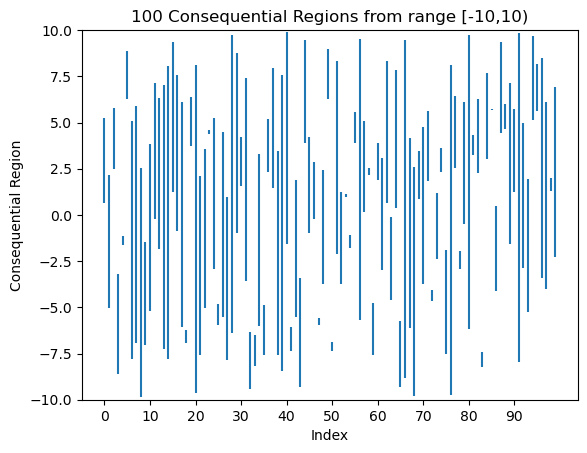

In [2]:
n=10000
CR_list = np.random.uniform(low=-10, high=10, size=(n,2))

for region in CR_list:
    region.sort()

CR_list = [tuple(region) for region in CR_list]

#YOUR CODE HERE

figure, axis = plt.subplots()
axis.vlines(np.arange(100), [i[0] for i in CR_list[:100]], [i[1] for i in CR_list[:100]])
axis.set_xticks(np.arange(0, 100, step=10))
axis.set_ylim(-10, 10)
axis.set_xlabel('Index')
axis.set_ylabel('Consequential Region')
axis.set_title('100 Consequential Regions from range [-10,10)')

figure.savefig('PS3_Q1.png')

## Q2 Helper Function [5 pts, SOLO]
Write a function called `contains` that takes a region and a point and checks if the region contains the given point (consequential regions are inclusive). You may find it helpful to use this function throughout the rest of this assignment.

For each point in [-10, 10] with increments of 0.1, plot the proportion of regions that contain that point. Use all 10,000 regions for this question.

Upload your figure in Gradescope as `PS3_Q2.png`.

**Hint:** The function should return `True` if the point is contained in the region and `False` if not.

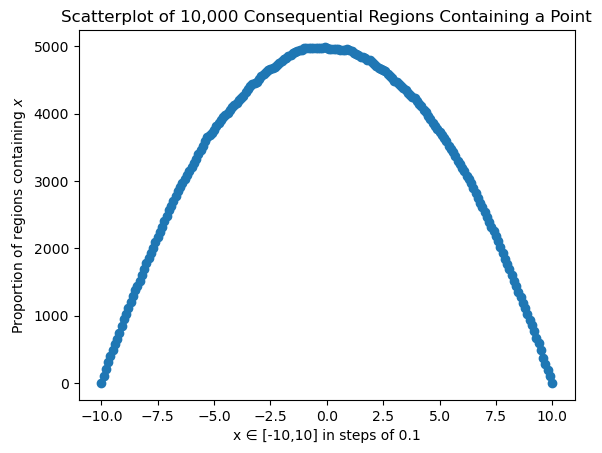

In [3]:
def contains(region, point):
    """ Takes a region (a 2-tuple) and a point (a float) and 
    Returns:
      - 'True' if the point is contained in the region (boundaries defined by the 2-tuple)
      - 'False' if the point is outside of the region """
    #YOUR CODE HERE
    if point >= region[0] and point <= region[1]:
        return True
    return False

#YOUR CODE HERE

contain_arr = []
x = np.arange(-10, 10.1, 0.1)
for i in x:
    count = np.count_nonzero([contains(region, i) for region in CR_list])
    contain_arr.append(count)

figure, axis = plt.subplots()
axis.scatter(x, contain_arr)
axis.set_xlabel('x ∈ [-10,10] in steps of 0.1')
axis.set_ylabel('Proportion of regions containing $x$')
axis.set_title('Scatterplot of 10,000 Consequential Regions Containing a Point')

figure.savefig('PS3_Q2.png')

## Q3 Conditional Probability [5 pts, SOLO] 

Below is a function that takes a list of possible consequential regions and a point $x$ and returns the probability of the actual consequential region (as approximated by the given list of regions) containing point $x$ conditioned on it containing point 0. For sanity check, this probability should be 1 for $x = 0$. The computation uses the probability rule P(A|B) = P(A$\wedge$B) / P(B), where A means \"$x$ is in the consequential region\" and B means \"$0$ is in the consequential region\". For conceptual understanding, please refer to class or to [Shepard (1987)](http://cseweb.ucsd.edu/~gary/PAPER-SUGGESTIONS/shepard-science-87.pdf).

In [4]:
def conditional_probability(CR_list, point):
    """ Returns the probability of having x in a given list of consequential regions
    conditioned on this list of consequential regions containing 0 """

    # Keep track of how many regions contain 0 and both x and 0
    n_0 = 0
    n_both = 0

    # Keep track probabilities of sampling 0 and x from regions containing them
    prob_0 = 0
    prob_both = 0

    # Loop through the list of possible regions
    for CR in CR_list:
        if contains(CR, 0):
            # How many regions contain 0?
            n_0 += 1
            # How likely is it to sample 0 from each region? Sum the probabilities
            prob_0 += 1 / (CR[1] - CR[0])
            if contains(CR, point):
                # How many regions contain both 0 and x?
                n_both += 1
                # How likely is it to sample x from each region? Sum the probabilities
                prob_both += 1 / (CR[1] - CR[0])

    # Average probability of getting a 0 from a region over all regions
    try:
        ave_prob_both = prob_both / n_both
    except ZeroDivisionError:
        ave_prob_both = 0

    # Average probability of getting both 0 and xfrom a region over all regions
    try:
        ave_prob_0 = prob_0 / n_0
    except ZeroDivisionError:
        ave_prob_0 = 0

    # The conditional probability
    try:
        cond_prob = ave_prob_both / ave_prob_0
    except ZeroDivisionError:
        cond_prob = 0

    return cond_prob
# Check function value at x = 1
print(conditional_probability(CR_list, 1))
# Check function value at x = 0
print(conditional_probability(CR_list, 0))

0.8526505088366272
1.0


Now that we have the function for computing conditional probabilities, for each point $x$ in [0, 10) in 0.1 increments, plot the probability of having $x$ in the actual consequential region conditioned on the region containing $x=0$. 

1. Save your plot as `PS3_Q3.png` and upload it to Gradescope.
2. What is the shape of the curve? Write one sentence to describe it. Does it match your expectation based on lecture 9? Explain why in one sentence. Provide your answers in Gradescope.

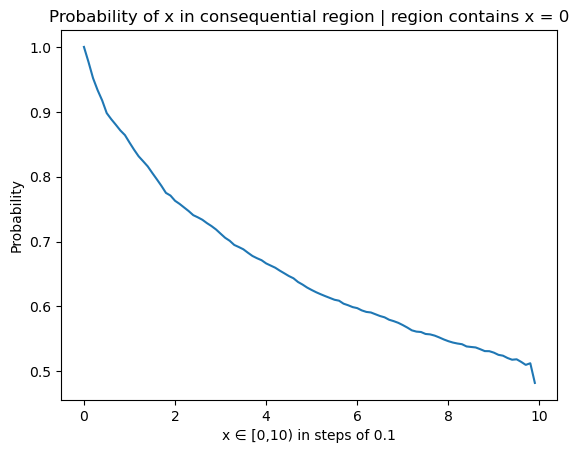

In [5]:
#YOUR CODE HERE
probs = []
x = np.arange(0, 10, 0.1)
for i in x:
    probs.append(conditional_probability(CR_list, i))
    
figure, axis = plt.subplots()
axis.plot(x, probs)
axis.set_xlabel('x ∈ [0,10) in steps of 0.1')
axis.set_ylabel('Probability')
axis.set_title('Probability of x in consequential region | region contains x = 0')

figure.savefig('PS3_Q3.png')

## Q4 Check Exponential Decrease [2 pts, HELP]

One way to check if the curve in Q3 has an exponential decrease is to plot a logarithmic $y$-axis and look for a straight line. *Why* can we check whether the curve is exponential by doing this? Please provide your answer in Gradescope.

## Q5.1 Logarithmic y-axis [5 pts, SOLO]
In two side-by-side subplots, plot the $log$ of conditional probabilities (each calculated in the same way as you did for Q3) on the $y$-axis for $x$ in [-5 to 5) (subplot 1 on the left) and for $x$ in [-9.9 to 9.9) (subplot 2 on the right), both in 0.1 increments. Upload a figure `PS3_Q5.png` that includes these two subplots in Gradescope and make sure to title each subplot, as well as the overall figure.

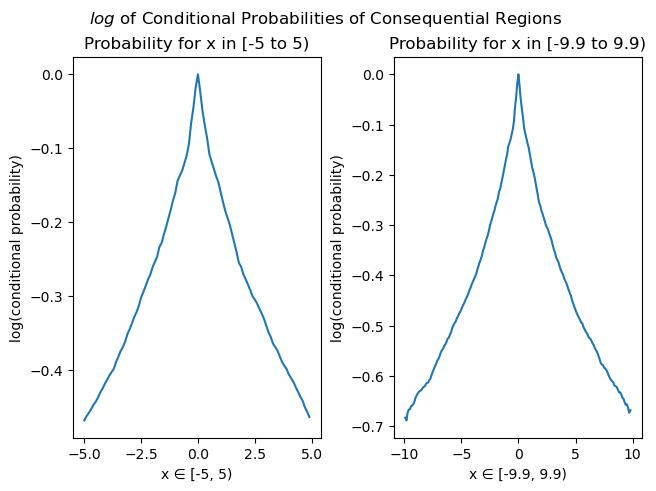

In [6]:
#YOUR CODE HERE
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-9.9, 9.9, 0.1)
probs1 = []
probs2 = []

for i in x1:
    probs1.append(np.log(conditional_probability(CR_list, i)))
    
for i in x2:
    probs2.append(np.log(conditional_probability(CR_list, i)))
    
figure, axis = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

figure.suptitle('$log$ of Conditional Probabilities of Consequential Regions')
axis[0].plot(x1, probs1)
axis[0].set_xlabel('x ∈ [-5, 5)')
axis[0].set_ylabel('log(conditional probability)')
axis[0].set_title('Probability for x in [-5 to 5)')

axis[1].plot(x2, probs2)
axis[1].set_xlabel('x ∈ [-9.9, 9.9)')
axis[1].set_ylabel('log(conditional probability)')
axis[1].set_title('Probability for x in [-9.9 to 9.9)')



figure.savefig('PS3_Q5.png')

## Q5.2 Logarithmic y-axis [3 pts, SOLO]
What do these two plots show? How do you interpret them? Explain in a few sentences in Gradescope.

## Q6 Limited Number of Regions [5 pts, SOLO]

In previous questions, we've been assuming that people implement Shepard’s Universal Law of Generalization perfectly and we have been trying to approximate their behavior using 10,000 possible consequential regions. However, people have limited resources: What if they only used a few consequential regions in order to compute generalizations? 

1. Re-plot Q3 using only 10, 100, and 1000 consequential regions in the same plot (**NOT** 3 subplots) and make sure to have a legend. As in Q3, $x$ ranges from 0 to 10 in 0.1 increments. Save your plot as `PS3_Q6.png` and upload it to Gradescope.
2. What patterns do you see when the number of consequential regions changes? What is the same, what is different?  Provide your explanation in Gradescope, in 2-3 sentences max.

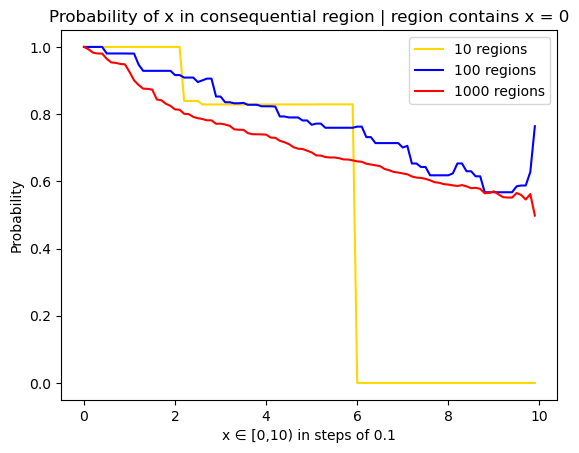

In [7]:
#YOUR CODE HERE

probs10 = []
probs100 = []
probs1000 = []
x = np.arange(0, 10, 0.1)
for i in x:
    probs10.append(conditional_probability(CR_list[:10], i))
    probs100.append(conditional_probability(CR_list[:100], i))
    probs1000.append(conditional_probability(CR_list[:1000], i))

    
figure, axis = plt.subplots()
axis.plot(x, probs10, color='gold', label='10 regions')
axis.plot(x, probs100, color='blue', label='100 regions')
axis.plot(x, probs1000, color='red', label='1000 regions')
axis.legend()
axis.set_xlabel('x ∈ [0,10) in steps of 0.1')
axis.set_ylabel('Probability')
axis.set_title('Probability of x in consequential region | region contains x = 0')

figure.savefig('PS3_Q6.png')

## Q7 Normal Distribution [5 pts, SOLO]

In previous questions, we've been assuming that the consequential regions' start and end points were drawn uniformly (i.e., from a Uniform distribution). What if they were drawn from a Normal distribution instead? Re-plot Q5.1 with a new set of 10,000 possible consequential regions where the start and the end points are drawn from a Normal distribution with mean = 0 and standard deviation = 3. 

1. Save your plot as `PS3_Q7.png` and upload it to Gradescope.
2. How robust do you feel the generalization law is to different assumptions, such as the distribution of consequential regions? Write down your answer in Gradescope.

/tmp/ipykernel_111/3934599676.py:19: RuntimeWarning: divide by zero encountered in log
  probs2.append(np.log(conditional_probability(normal_CR_list, i)))


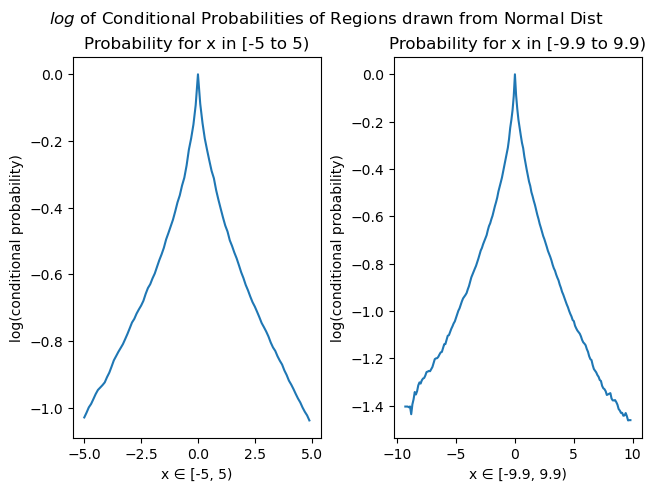

In [8]:
n = 10000
normal_CR_list = np.random.normal(loc=0.0, scale=3.0, size=(n,2))

for region in normal_CR_list:
    region.sort()

normal_CR_list = [tuple(region) for region in normal_CR_list]

#YOUR CODE HERE
x1 = np.arange(-5, 5, 0.1)
x2 = np.arange(-9.9, 9.9, 0.1)
probs1 = []
probs2 = []

for i in x1:
    probs1.append(np.log(conditional_probability(normal_CR_list, i)))
    
for i in x2:
    probs2.append(np.log(conditional_probability(normal_CR_list, i)))
    
figure, axis = plt.subplots(nrows=1, ncols=2, constrained_layout=True)

figure.suptitle('$log$ of Conditional Probabilities of Regions drawn from Normal Dist')
axis[0].plot(x1, probs1)
axis[0].set_xlabel('x ∈ [-5, 5)')
axis[0].set_ylabel('log(conditional probability)')
axis[0].set_title('Probability for x in [-5 to 5)')

axis[1].plot(x2, probs2)
axis[1].set_xlabel('x ∈ [-9.9, 9.9)')
axis[1].set_ylabel('log(conditional probability)')
axis[1].set_title('Probability for x in [-9.9 to 9.9)')


figure.savefig('PS3_Q7.png')

## Q8 Why Universal? [5 pts, HELP]

Answer the following questions in Gradescope, a couple of sentences for each:
1. Why did Shepard consider this law as "universal"?
2. Do you think this "universal" qualification is valid? Explain why or why not.

<div style="background-color: #c1f2a5">


# Part 2

In part 2, we are going to implement the perceptron algorithm on a very simple feature space: pixels in images of handwritten digits.

The last bit of this part might take a while to run, so make sure you get started early!

<br>    
</div>

## Import images for classification

In this assignment, we will train a perceptron to classify images of handwritten digits 0-9. 

To facilitate training our perceptron, we have provided a function to read image files (load_image_files) of a given digit (n), from a provided path (path=...), convert them to a numpy array, and finally flatten that numpy array into a vector. The function `load_image_files` returns all of the vectors corresponding to pixels in handwritten digits of $n$ from the MNIST dataset, which are stored in the corresponding $n$ folder. For instance, the "1" folder contains all the vectors representing images of handwritten 1s. This function returns “images” of 28x28=784 zeroes and ones, corresponding to whether the image was black or white at a given location. 

Note that for convenience for the assignment, each “image” returned to you is a single vector of length 784.

Functions that might be useful throughout this assignment and what you can used them for (please read the documentation):

- `x.flatten()` &ndash; take an N-dimensional numpy array and make it one-dimensional
- `np.random.choice` &ndash; choose from the list of images; use `replace=False` to sample without replacement
- `np.dot()` &ndash; compute the dot product of two vectors: the sum of the product of the coordinates.
- `np.reshape()` &ndash; reshape a vector to a matrix
- `ax = imshow(x)` &ndash; visualize a matrix as an image

Run the following cell to load the first two sets of images for this assignment. For this to work, make sure your 'images' folder is in the same directory that your Jupyter notebook is saved in (NOTE: If you are using JupyterHub, this will automatically work). Depending on your setup, it might take a few seconds to minutes for files to unzip the first time.

In [37]:
DIM = (28,28) #these are the dimensions of the image

def load_image_files(n, path="images/", zip_path="images.zip"):
    # helper file to help load the images
    # returns a list of numpy vectors
    # check if the images directory has already been unzipped
    # if not, unzip its contents
    if not os.path.exists(path):
        with zipfile.ZipFile(zip_path, "r") as zf:
            zf.extractall(path[:-1])  # Extract all contents to the directory
    images = []
    for f in sorted(os.listdir(os.path.join(path,str(n)))): # read files in the path
        p = os.path.join(path,str(n),f)
        if os.path.isfile(p):
            i = np.loadtxt(p)
            assert i.shape == DIM # just check the dimensions here
            # i is loaded as a matrix, but we are going to flatten it into a single vector
            images.append(i.flatten())
    return images
            

# Load up these image files
A = load_image_files(0)
B = load_image_files(1)

N = len(A[0]) # the total size
assert N == DIM[0]*DIM[1] # just check our sizes to be sure

# set up some random initial weights
weights = np.random.normal(0,1,size=N)

In [48]:
path="images/"
zip_path="images.zip"
with zipfile.ZipFile(zip_path, "r") as zf:
    zf.extractall(path[:-1])  # Extract all contents to the directory

## Q9. Visualize the images [5 pts, SOLO]

Let's explore what we have loaded so far by examining the type and length of A (images of the handwritten number '0') and B (images of the handwritten number '1').

In [38]:
print('The data type of A is:',type(A))
print('\nThe number of images in A is: ', len(A))
print('\nEach image in A is of the form: ', type(A[0]), ' with length: ', len(A[0]))
print('\nThe number of images in B is: ',len(B))

The data type of A is: <class 'list'>

The number of images in A is:  5923

Each image in A is of the form:  <class 'numpy.ndarray'>  with length:  784

The number of images in B is:  6742


For Q9, visualize three randomly chosen examples of the "1" images, and three randomly chosen examples of the "0" images in a figure with subplots in 2 rows and 3 columns. Make sure to indicate in each subplot title which number is being shown. 

You will need to use the np.reshape function to put each image back into a square matrix. Check one of the previous problem sets on how to visualize an array as an image! 

Remove x and y tickmarks for every subplot. Since these are images, **do not label your x- and y-axes**. You should include titles on each subplot indicating which numbers are shown, and one overall figure title.

Save the overall figure (all subplots in one figure) image as a png (refer to previous assignments, or right click and select 'Save As' in Jupyter)... and put the png in Gradescope.


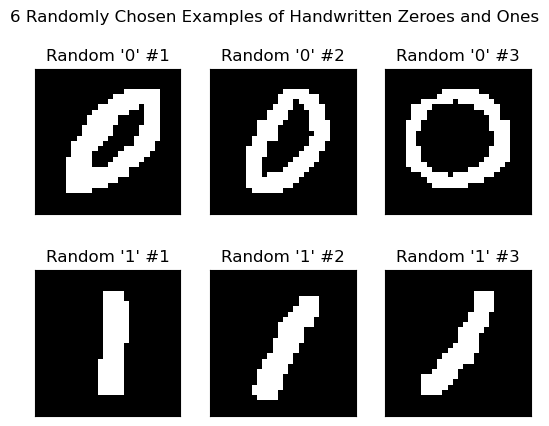

In [11]:
figure, axis = plt.subplots(2,3)

#YOUR CODE HERE
randA_indices = np.random.choice(len(A), size=3, replace=False)
randB_indices = np.random.choice(len(B), size=3, replace=False)

randA = [np.reshape(A[i], (28,28)) for i in randA_indices]
randB = [np.reshape(B[i], (28,28)) for i in randB_indices]

axis[0,0].matshow(randA[0], cmap='gray')
axis[0,1].matshow(randA[1], cmap='gray')
axis[0,2].matshow(randA[2], cmap='gray')

axis[1,0].matshow(randB[0], cmap='gray')
axis[1,1].matshow(randB[1], cmap='gray')
axis[1,2].matshow(randB[2], cmap='gray')

figure.suptitle('6 Randomly Chosen Examples of Handwritten Zeroes and Ones')

for i in np.arange(2):
    for j in np.arange(3):
        if i == 0:
            axis[i,j].set_title(f"Random '0' #{j+1}")
        else:
            axis[i,j].set_title(f"Random '1' #{j+1}")
        axis[i,j].set_xticks([])
        axis[i,j].set_yticks([])


figure.savefig('PS3_Q9.png')

## Q10.1 Perceptron output part 1 [2.5 pts, HELP]

Write the `compute_output` function that takes 1) the weights $W = (w_1, \ldots, w_N)$ of the perceptron and 2) an image $X = (x_1, \ldots,x_N)$ as a vector of $N=784$ features, and computes the perceptron's output.

As a reminder, to compute the perceptron's output, you should:
- compute $y = \sum_i w_i \times x_i$. Look-up `np.dot` to speed up your code.
- return $1$ if $y>0$, $0$ otherwise.

Test your function with the test case we provide, and try other test cases of your own.

When you are finished, copy and paste your function code into the designated spot on Gradescope.

In [12]:
def compute_output(W, image):
    """
    Computes the output of the current network with weight matrix W for one image.
    
    Parameters
    ----------
    W: the weight matrix (1,n)
    image:  a length n array of input features representing one image

    Returns
    -------
    the 1 or 0 output of the network

    """
    # YOUR CODE HERE
    y = np.dot(W, image)
    if y > 0:
        return 1
    return 0

In [13]:
# TEST YOUR FUNCTION ON YOUR OWN HERE
A = load_image_files(0)
B = load_image_files(1)
weights = (np.arange(len(A[0]))/(len(A[0])))-.5

Q10_test = np.empty(10)
for i in range(5):
    Q10_test[2*i] = compute_output(A[i],weights)
    Q10_test[2*i + 1] = compute_output(B[i],weights)

print(['Q10_test should return [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]. Q10_test: ' + str(Q10_test)])


['Q10_test should return [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]. Q10_test: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]']


## Q10.2 Perceptron output part 2 [2.5 pts, HELP]
Copy and paste the printed output from the below cell into Q10.2 in Gradescope.

**Note that this question is autograded. To ensure accurate grading, please do not change the provided print statement and be careful as you copy and paste.**

In [14]:
Q10_answers = np.empty(10)
weights = np.sin(np.arange(len(A[0])))
for i in range(5):
    Q10_answers[2*i] = compute_output(A[i],weights)
    Q10_answers[2*i + 1] = compute_output(B[i],weights)
    
print(f'Q10 answer: {Q10_answers}')   # DO NOT CHANGE THIS!

Q10 answer: [1. 0. 1. 0. 1. 1. 1. 0. 0. 0.]


## Q11.1 Overall accuracy part 1 [2.5 pts, SOLO]
Write a function that computes the current accuracy of the network on a set of images.

Test your function with the provided test case on your own.

When you are done, copy and paste your function code in the Gradescope prompt.

In [15]:
def compute_accuracy(W,images,labels):
    """
    Computes the network accuracy on a list of images
    
    Parameters
    ----------
    W: the current weight matrix
    images:  list of length n array images for number
    labels: list of correct labels for images

    Returns
    -------
    Proportion of correct labels

    """
    output = []
    for image in images:
        output.append(compute_output(W, image))
    
    i = 0
    for o in np.arange(len(output)):
        if output[o] == labels[o]:
            i += 1
            
    return i / len(labels)


In [16]:
# TEST YOUR FUNCTION ON YOUR OWN
weights = (np.arange(len(A[0]))/(len(A[0])))-.5
accuracyA = compute_accuracy(weights,A,np.zeros(len(A)))
print('accuracy on "0" images should be 0.0595981765996961. accuracyA is ', accuracyA)
accuracyB = compute_accuracy(weights,B,np.zeros(len(B)))
print('accuracy on "1" images should be 0.10872144764164936. accuracyB is ', accuracyB)



accuracy on "0" images should be 0.0595981765996961. accuracyA is  0.0595981765996961
accuracy on "1" images should be 0.10872144764164936. accuracyB is  0.10857312370216553


## Q11.2 Overall accuracy part 2 [2.5 pts, SOLO]

Report in Gradescope the output for 0 and 1 images for the perceptron defined by `sin_weights`, provided below. 

**Note that this question is autograded. To ensure accurate grading, please do not change the provided print statement and be careful as you copy and paste. Do NOT round your answers.**

In [17]:
# Q11 output
sin_weights = np.sin(np.arange(len(A[0])))
accuracyA = compute_accuracy(sin_weights,A,np.zeros(len(A)))
accuracyB = compute_accuracy(sin_weights,B,np.zeros(len(B)))

print(f'Q11_answer: accuracy on "0" images is {accuracyA}, accuracy on "1" images is {accuracyB}')  # DO NOT CHANGE THIS!

Q11_answer: accuracy on "0" images is 0.5043052507175417, accuracy on "1" images is 0.5103826757638683


## Q12. Updating the weights after one single training example [5pts, HELP]

Write the function `update_weights_single_image` that updates the network's weights with one example: an image and its label (1 or 0) over one update cycle. 

Use the following learning algorithm for this perceptron.

Simplest perceptron algorithm:
1. Use the input W to compute $y = \sum_i w_i \times x_i$ and determine the predicted label (either 1 or 0).   
   
2. If predicted and true labels disagree:  
    $\rightarrow$ If true label is “1”: W += x   
    $\rightarrow$ If true label is "0": W -= x   
   If predicted and true labels agree, do nothing.

See Lecture 12 on Simple Networks to refresh on this learning algorithm.


In [18]:
def update_weights_single_image(W,image,label):
    """
    Updates the weight matrix W after one training (image,label) pair.
    
    
    Parameters
    ----------
    W: the current weight matrix
    image:  a length n array of input features representing one image
    label: a single number indicating whether the image is a 0 or a 1

    Returns
    -------
    the new perceptron weight matrix (same size as W)

    """
    
    # YOUR CODE HERE
    weights = W
    output = compute_output(W, image)
    if output != label:
        if label == 1:
            for i in np.arange(len(W)):
                weights[i]  += image[i]
        elif label == 0:
            for i in np.arange(len(W)):
                weights[i] -= image[i]
    return weights

**Next:** 

Start with weights of all 0's, and train the perceptron on a single image, the first image of a "1". Visualize the trained weights the same way you visualized the images in Q9 by first reshaping them into a (28,28) shape. Use the same label and format guidelines as for Q9. If you do this correctly, your image should have a clear pattern. Take a moment to think why you might see this pattern.

Upload your image to Gradescope.

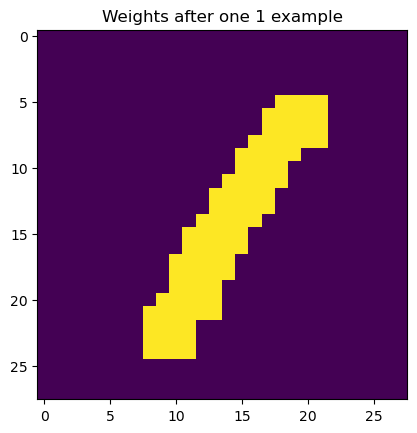

In [19]:
weights = np.zeros(len(B[0]))
# YOUR CODE HERE
update_weights_single_image(weights,B[0],1)


figure, axis = plt.subplots()
im = axis.imshow(np.reshape(weights, [28,28]))

# set the title
axis.set_title('Weights after one 1 example');
figure.savefig('PS3_Q12.png')

## Q13. Train with multiple images [5 pts, SOLO]

Write the function `update_weights_multiple_images` that takes starting network weights, the images and their labels, and applies the previous training to all images in order.

This function should use your previous function that updated weights based on a single image. Copy your function into Gradescope.

In [20]:
def update_weights_multiple_images(W,images,labels):
    """
    Updates the weight matrix W with multiple training (image,label) pairs.
    
    Parameters
    ----------
    W: the current weight matrix
    images:  list of images (each image a length n array)
    labels: list of labels (1 or 0)

    Returns
    -------
    the new perceptron weight matrix (same size as W)

    """
    
    # YOUR CODE HERE
    for image, label in zip(images, labels):
        W = update_weights_single_image(W,image,label)
    
    return W


## Q14. Train your perceptron! [5 pts, SOLO]

We'll train the preceptron in small batches. We first initialize the weights from a random normal distribution. We'll select `N_samples` images of "0"s and `N_samples` images of "1"s randomly, then train the weights on this small batch. We'll then iterate this for as many steps as needed.

We're providing the `train_perceptron` function (read and make sure to check that you understand the function).


In [21]:
def train_perceptron(train_0, train_1,N_samples = 5, steps = 200):
    performance = np.empty(steps)
    train_labels = np.ones(2*N_samples)
    train_labels[0:N_samples] = np.zeros(N_samples)
    
    full_sample = train_0+train_1
    full_labels = np.ones(len(full_sample))
    full_labels[0:len(train_0)]=np.zeros(len(train_0))

    # set up some random initial weights
    weights = np.random.normal(0,1,size=N)
    for i in range(steps):
        examples_0 = [train_0[j] for j in np.random.choice(np.arange(len(train_0)),size=N_samples,replace = False).tolist()]
        examples_1 = [train_1[j] for j in np.random.choice(np.arange(len(train_1)),size=N_samples,replace = False).tolist()]
        examples = examples_0+examples_1
        
        weights = update_weights_multiple_images(weights,examples,train_labels)
        performance[i] = compute_accuracy(weights,full_sample,full_labels)
        
    return performance, weights


Plot the performance (i.e., accuracy) as a function of time (i.e., step) for N_samples = 1, 5, and 25. Use 200 steps for each. Place the three subplots into one figure with subplots in 3 rows and 1 column, and an overall figure size of (8,12). 
- Choose y axis limits that work well for your values (e.g, (0.7, 1.2)) and use them consistently across subplots
- Make sure to indicate with titles which subplot reflects which number of training samples! Also make sure to add an overall figure title.
- Run this multiple times, and select the set of subplots  you find most representative to copy into Gradescope.

**A**. Upload your image to Gradescope.

**B**. How many steps should we run? Explain (in the Gradescope prompt) in a couple of sentences your heuristic/how you made your decision.

**C**. Does your solution converge on 100% accuracy or not? What does this mean in terms of the linear separability of “0” and “1” on this feature space?


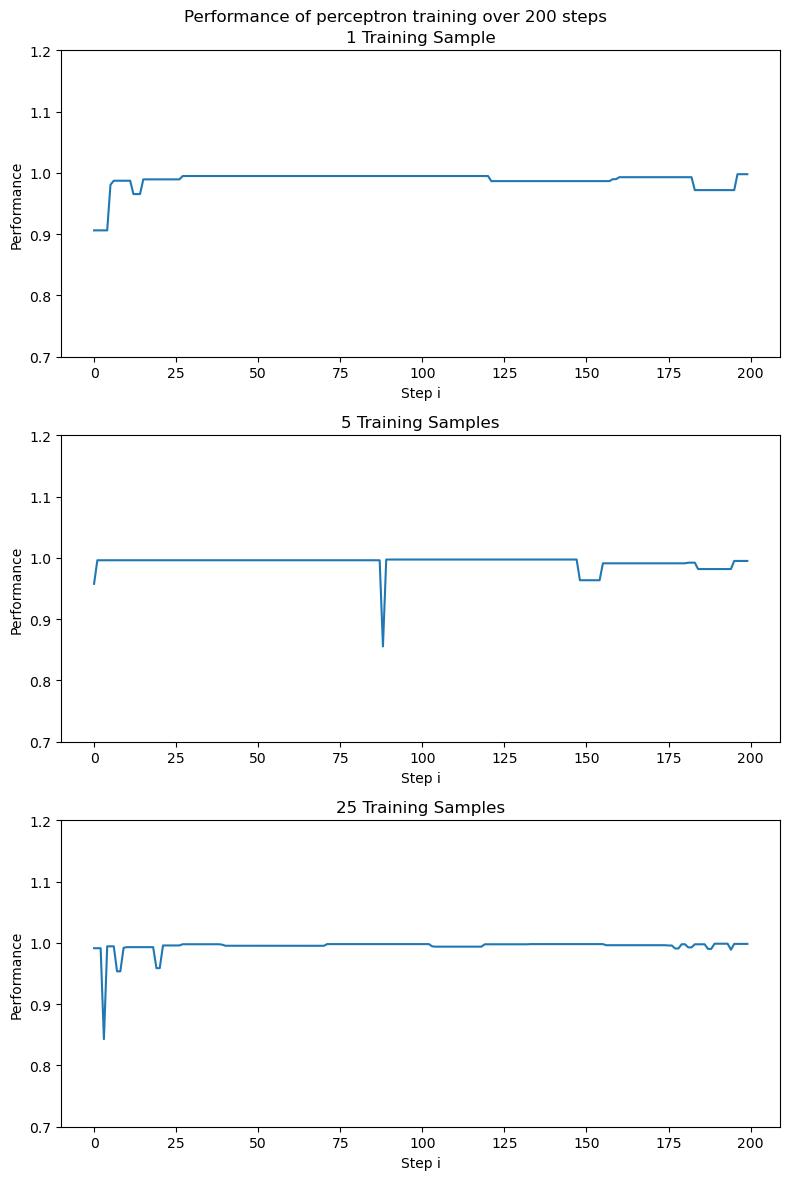

In [22]:
figure, axis = plt.subplots(nrows=3,ncols=1,figsize=(8,12)) #YOUR CODE HERE

performance1, weights1 = train_perceptron(A,B,N_samples=1) 
performance5, weights5 = train_perceptron(A,B,N_samples=5)
performance25, weights25 = train_perceptron(A,B,N_samples=25)

time = np.arange(200)

axis[0].plot(time, performance1)
axis[0].set_title('1 Training Sample')
axis[1].plot(time, performance5)
axis[1].set_title('5 Training Samples')
axis[2].plot(time, performance25)
axis[2].set_title('25 Training Samples')

for i in np.arange(3):
    axis[i].set_ylabel('Performance')
    axis[i].set_ylim(0.7, 1.2)
    axis[i].set_xlabel('Step i')
    
figure.suptitle('Performance of perceptron training over 200 steps')


#YOUR CODE HERE
figure.tight_layout()  # do not delete this to ensure all labels are visible
figure.savefig('PS3_Q14.png')

## Q15. Trained weights [5pts, SOLO]

Reshape your fitted weights (for the N_samples = 25, steps = 200 case) into the usual (28,28) shape and visualize them. Show a picture of this weight matrix. There's no need to label your axes this time, but add a color bar to your plot, as well as a title. 

**(A)** Upload your plot to Gradescope. 
   
**(B)** Interpret your plot using 1-3 sentences in the Gradescope prompt, addressing each of the following points to receive full credit: 

- What do large negative and large positive values mean, intuitively? 
- What do numbers near zero mean? 
- Why does this matrix look the way that it does, in terms of where large positive and negative terms are located?

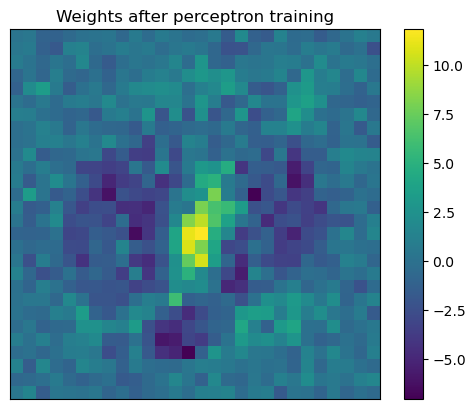

In [23]:
#YOUR CODE HERE
figure, axis = plt.subplots()

im = axis.imshow(np.reshape(weights25, [28,28]))
axis.figure.colorbar(im)
axis.set_xticks([])
axis.set_yticks([])
axis.set_title('Weights after perceptron training')

figure.savefig('PS3_Q15.png')

## Q16. Zeroing weights [5 pts, HELP] 
What should you expect to happen if you set the elements of the weight vector which are close to zero to be actually zero? We will explore this by starting with the trained weights from the N_samples = 25, steps = 200 case (as calculated above in Q14).

Set the 7, 14, 21, ... 784 weight values closest to zero (in absolute value) to be actually 0, and calculate the accuracy in each case on classifications for “0” and “1” for 1000 randomly chosen samples of each. 

Create a plot with one line showing accuracy for "0" images vs. number of small values set to zero, and another line on the same plot showing accuracy for "1" images vs. number of small values set to zero.

Use a different color for each line, and make sure your plot shows a legend with labels, in addition to a title, and x- and y-axis labels. Set your y-axis limits to [0.5,1.1]. (You do not need to adjust the x-axis limits; they should automatically range from 0 to around 800).

**(A)**  Upload your plot to Gradescope.
  
  
**(B)**  What does this tell you about the proportion of the image which is diagnostic about “0” vs “1”? Enter your written response to this question at the Gradescope prompt.




### A.  Upload your plot into Gradescope.

In [24]:
#Set the trained weights to use (if needed)

#YOUR CODE HERE

In [30]:
#Iterate through the various subsets of weights to zero out, and perform the accuracy calculations for the
#"0" and "1" examples on each iteration

#Hint: You may wish to work with a .copy() of your starting trained weights, just in case anything gets 
#accidentally overwritten while coding

#YOUR CODE HERE

randA_indices = np.random.choice(len(A), size=1000, replace=False)
randB_indices = np.random.choice(len(B), size=1000, replace=False)
randA = [A[i] for i in randA_indices]
randB = [B[i] for i in randB_indices]

accuracy0 = []
accuracy1 = []

for i in np.arange(7, 791, 7):
    copy = np.copy(weights25)
    indices = np.argsort(np.absolute(copy))
    for j in np.arange(i):
        copy[indices[j]] = 0    
    accuracy0.append(compute_accuracy(copy, randA, np.zeros(1000)))
    accuracy1.append(compute_accuracy(copy, randB, np.ones(1000)))


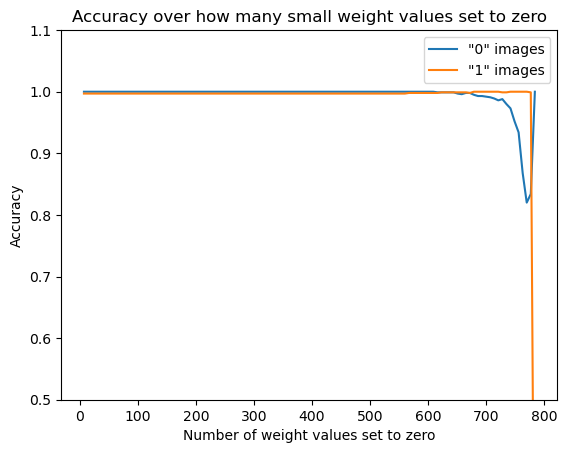

In [34]:
#Plot the results according to the instructions above

x = np.arange(7, 791, 7)

figure, axis = plt.subplots()

axis.plot(x, accuracy0, label='"0" images')
axis.plot(x, accuracy1, label='"1" images')
axis.set_ylim(0.5,1.1)
axis.set_xlabel('Number of weight values set to zero')
axis.set_ylabel('Accuracy')
axis.set_title('Accuracy over how many small weight values set to zero')
axis.legend()

#YOUR CODE HERE
figure.savefig('PS3_Q16.png')

## Q17. Classifying multiple digits [5 pts, HELP]

Train a perceptron for each possible pair of digits (not just "0" vs. "1", but also "0" vs. "2", ..., "8" vs."9") using the default parameters.

Note that you can still use your previous `train_perceptron` function for any pair of digits. The classifier will internally refer to them as '0' or '1' as a binary indicator of group, but the effect of the training will be to distinguish whichever two numbers the perceptron is being trained on. 

Store the accuracy on the full data set for each pair of digits in a 10 by 10 matrix (the diagonal elements' value should be 1). Visualize the matrix as an image with colors indicating the accuracy. Add a colorbar, and ticks and labels indicating the digits. You should also label your x and y axis for this plot.

**(A)**  Upload your final plot to Gradescope.  
   
**(B)**  What does this plot tell you about which pairs of numbers may be harder to identify? Does this match your intuitions? Answer in 2-3 sentences in Gradescope.

Tips: this may take a while to run (depending on your code efficiency, it could take a few minutes to an hour). Start early, and when you develop your code, try it out with just digits until 3 or 4. When you think it's working, run it for all digits up to 9. It's also advisable to use print statements or plots to monitor progress to make sure your code isn't getting stuck somewhere indefinitely or for too long.


0.9888669561784446
0.9797155121622759
0.9853990376638461
0.9829154271143221
0.9780500705218618
0.9861498184274977
0.993764358385297
0.9799558348904366
0.9878706199460916
0.9748818897637795
0.9825992387166939
0.9902256834075016
0.99087396201595
0.9955766192733018
0.9846236641808257
0.9748272849996029
0.9899929083602553
0.9628587972537017
0.98
0.9725810703928289
0.9710340181879421
0.9234230548965066
0.9543568464730291
0.975644578819182
0.9910632255909129
0.8411530470914127
0.9904556394721553
0.9782187802516941
0.9497579702887665
0.9654801324503312
0.9769155642368819
0.9820578231292517
0.9710085074750144
0.9548447789275635
0.9160376558391994
0.9626069318282036
0.9860516857778538
0.8911462029808375
0.9755496921723835
0.99622424690142
0.9225082844761662
0.9935114182185893
0.9790359854737537
0.9081382020632062
0.9411016949152542


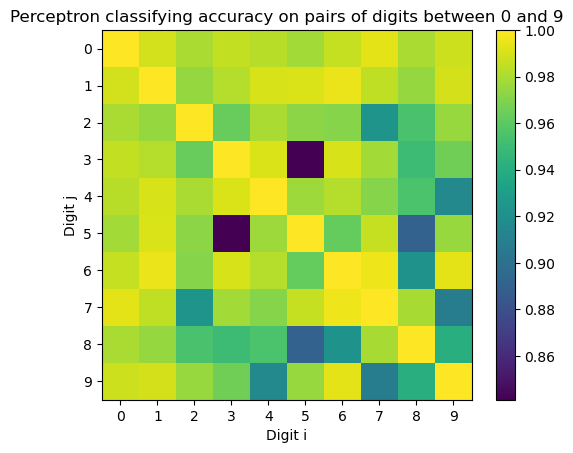

In [54]:
#YOUR CODE HERE

accuracy = np.ones((10,10))

for i in np.arange(10):
    for j in np.arange(i,10):
        if i == j: continue
        letter_i = load_image_files(i)
        letter_j = load_image_files(j)
        performance, weights = train_perceptron(letter_i, letter_j)
        print(performance[-1])
        accuracy[i,j] = performance[-1]
        accuracy[j,i] = performance[-1]

figure, axis = plt.subplots()
im = axis.imshow(accuracy)
cbar = axis.figure.colorbar(im)

axis.set_xticks(np.arange(10), labels=np.arange(10))
axis.set_yticks(np.arange(10), labels=np.arange(10))
axis.set_xlabel('Digit i')
axis.set_ylabel('Digit j')
axis.set_title('Perceptron classifying accuracy on pairs of digits between 0 and 9')

figure.savefig('PS3_Q17.png')

<div style="background-color: #c1f2a5">

# Submission

    
When you're done with your problem set, do the following:
- Upload your answers in Gradescope's PS3.
- Convert your Jupyter Notebook into a `.py` file by doing so:    
    
</div>


<center>    
  <img src="../img/py_exporting_instructions.png" width="500"/>
</center>

<div style="background-color: #c1f2a5">
    
- Submit the `.py` file you just created in Gradescope's PS3-code.
    
</div>        




</div>
